Do note if running from scratch the following files\folders must be configured and added to your personal drive or copied by hand.


---


1. data folder(zipped) containning trainning, validation and testing folders with tfrecord type files (test files excluded), data folder must include labal_map(see number 3.)
2. pipeline.config file into workspace/models/<'your model folder'>/v1/ which can be obtained from the pre-trained model, do note that you must configue and set it up correctly with the correct configurations.
3. a labal_map.txt file in the /workspace/data/ folder that will contain class objects you're going to work with.
4. copy exporter_main_v2.py and model_main_tf2.py from the downloaded support folder of ./models/research/object_detection/ into /workspace/ folder.

the code will run smoothly if data folder is zipped and ready, and the other files are all uploaded to personal drive for the program to grab.


---


***Otherwise start from "unskippable" part and download the whole workspace from github with everything setup***

# Skippable part which was the initial setting up for the workspace, skip up untill "Unskippable"

In [1]:
import shutil

shutil.rmtree('/content/sample_data')

In [ ]:
!gdown http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8.tar.gz

In [ ]:
mkdir workspace

In [ ]:
cd workspace

In [ ]:
mkdir exported_models

In [ ]:
cd exported_models

In [ ]:
mkdir ssd_mobilenet_v2_fpnlite

In [ ]:
cd ..

In [ ]:
mkdir pre_trained_models

In [ ]:
mkdir models

In [ ]:
cd models

In [ ]:
mkdir ssd_mobilenet_v2_fpnlite

In [ ]:
cd ssd_mobilenet_v2_fpnlite

In [ ]:
mkdir v1

In [ ]:
cd /content

In [ ]:
#!tar -z ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8.tar.gz
!tar -xzvf "ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8.tar.gz" -C "/content/workspace/pre_trained_models"     #[run this cell to extract tar.gz files]

# Upload data rfrecord files, .py helper scripts and pipeline.config settings we set up.

In [ ]:
cd /content

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

In [ ]:
cp /content/gdrive/MyDrive/data.zip /content/

In [ ]:
cp /content/gdrive/MyDrive/exporter_main_v2.py /content/workspace

In [ ]:
cp /content/gdrive/MyDrive/model_main_tf2.py /content/workspace

In [ ]:
cp /content/gdrive/MyDrive/pipeline.config /content/workspace/models/ssd_mobilenet_v2_fpnlite/v1

In [ ]:
!unzip data.zip -d /content/workspace 

# We have model we trained before that we're going to use with better configs

In [ ]:
cp /content/gdrive/MyDrive/mode_v1.zip /content/

In [ ]:
cd /content/

In [ ]:
!unzip mode_v1.zip -d /content/workspace/models/ssd_mobilenet_v2_fpnlite/v1

In [ ]:
cd /content/workspace

# Unskippable part

In [2]:
cd /content/

/content


In [3]:
!git clone https://github.com/Mosa-T/Project_deep_learning.git

Cloning into 'Project_deep_learning'...
remote: Enumerating objects: 144, done.
remote: Counting objects: 100% (144/144), done.
remote: Compressing objects: 100% (136/136), done.
remote: Total 144 (delta 43), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (144/144), 287.71 MiB | 15.13 MiB/s, done.
Resolving deltas: 100% (43/43), done.
Checking out files: 100% (46/46), done.


In [4]:
mv /content/Project_deep_learning/workspace /content/ \
mv /content/Project_deep_learning/DL_project_v3.ipynb /content/ \
mv /content/Project_deep_learning/input.mp4 /content/

mv: cannot move '/content/' to a subdirectory of itself, '/content/content'
mv: cannot stat 'mv': No such file or directory
mv: warning: source directory '/content/' specified more than once
mv: cannot stat 'mv': No such file or directory


In [5]:
shutil.rmtree('/content/Project_deep_learning')

In [6]:
!pip install tensorboard

In [7]:
!pip install lvis

In [8]:
!apt-get install protobuf-compiler python-pil python-lxml python-tk
!pip install Cython tf_slim
!git clone https://github.com/tensorflow/models.git
%cd /content/models/research
!protoc object_detection/protos/*.proto --python_out=.
%set_env PYTHONPATH=/content/models/research:/content/models/research/slim
import os
os.environ['PYTHONPATH'] += ":/content/models"
import sys
sys.path.append("/content/models")
!python object_detection/builders/model_builder_test.py

Reading package lists... Done
Building dependency tree       
Reading state information... Done
protobuf-compiler is already the newest version (3.0.0-9.1ubuntu1).
python-tk is already the newest version (2.7.17-1~18.04).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  python-bs4 python-chardet python-html5lib python-olefile
  python-pkg-resources python-six python-webencodings
Suggested packages:
  python-genshi python-lxml-dbg python-lxml-doc python-pil-doc python-pil-dbg
  python-setuptools
The following NEW packages will be installed:
  python-bs4 python-chardet python-html5lib python-lxml python-olefile
  python-pil python-pkg-resources python-six python-webencodings
0 upgraded, 9 newly installed, 0 to remove and 40 not upgraded.
Need to get 1,614 kB of archives.
After this operation, 8,908 kB of additional disk space will be used.
Get:1 htt

In [38]:
cd /content/

/content


In [9]:
pip install tensorflow-addons

     |████████████████████████████████| 1.1 MB 8.1 MB/s 


In [10]:
import multiprocessing

cores = multiprocessing.cpu_count() # Count the number of cores in a computer
cores

2

In [11]:
!export CUDA_VISIBLE_DEVICES=0,1

# Train model

In [ ]:
cd /content/workspace

In [ ]:
!python model_main_tf2.py --pipeline_config_path=/content/workspace/models/ssd_mobilenet_v2_fpnlite/v1/pipeline.config --model_dir=/content/workspace/models/ssd_mobilenet_v2_fpnlite/v1 --checkpoint_every_n=5 --num_workers=2 --alsologtostderr


# Export trained model

In [ ]:
!python exporter_main_v2.py --pipeline_config_path=/content/workspace/models/ssd_mobilenet_v2_fpnlite/v1/pipeline.config --trained_checkpoint_dir=/content/workspace/models/ssd_mobilenet_v2_fpnlite/v1 --output_directory=/content/workspace/exported_models/ssd_mobilenet_v2_fpnlite --input_type=image_tensor

# Validation model - logs using tensorboard - run locally

In [ ]:
!python model_main_tf2.py --pipeline_config_path=/content/workspace/models/ssd_mobilenet_v2_fpnlite/v1/pipeline.config --model_dir=/content/workspace/models/ssd_mobilenet_v2_fpnlite/v1/ --checkpoint_dir=/content/workspace/models/ssd_mobilenet_v2_fpnlite/v1/ --num_workers=2 --sample_1_of_n_eval_examples=1

In [ ]:
%load_ext tensorboard

In [ ]:
import tensorflow as tf
import datetime, os

In [ ]:
%tensorboard --logdir='C:/Users/Mosa-T/Desktop/content/workspace/models/ssd_mobilenet_v2_fpnlite/'

In [ ]:
tensorboard dev upload --logdir 'logs'

# Testing model

In [12]:
!pip install tensorflow
!pip install tqdm
!pip install tf_slim
!pip install scipy
!pip install tf-models-official
!pip install pyqt5
!pip install mmcv
!pip install multiprocess

     |████████████████████████████████| 1.8 MB 6.3 MB/s 
     |████████████████████████████████| 636 kB 66.4 MB/s 
     |████████████████████████████████| 90 kB 11.9 MB/s 
     |████████████████████████████████| 99 kB 11.4 MB/s 
     |████████████████████████████████| 211 kB 67.1 MB/s 
     |████████████████████████████████| 4.4 MB 54.6 MB/s 
     |████████████████████████████████| 1.2 MB 62.8 MB/s 
     |████████████████████████████████| 43 kB 2.8 MB/s 
     |████████████████████████████████| 37.1 MB 47 kB/s 
  Created wheel for py-cpuinfo: filename=py_cpuinfo-8.0.0-py3-none-any.whl size=22258 sha256=3fd77984a979dc0202c918c85484412a0f42e5e83b1cc531b988a9fda80ca008
  Stored in directory: /root/.cache/pip/wheels/d2/f1/1f/041add21dc9c4220157f1bd2bd6afe1f1a49524c3396b94401
  Created wheel for seqeval: filename=seqeval-1.2.2-py3-none-any.whl size=16181 sha256=7f511cf7e203a7c684d755213ae3e2fe023aa011c485310d61f9dda6525f24e3
  Stored in directory: /root/.cache/pip/wheels/05/96/ee/7cac4e74f3b

In [32]:
import os
import sys
path2scripts = './models/research/' #provide pass to the research folder
sys.path.insert(0, path2scripts) # making scripts in models/research available for import
import numpy as np
import time
import numpy as np
import mmcv, cv2
from threading import Thread
from PIL import Image, ImageDraw
from IPython import display
from matplotlib import pyplot as plt
%matplotlib inline
from tqdm import tqdm
import tensorflow as tf
from object_detection.utils import label_map_util
from object_detection.utils import config_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.builders import model_builder
import smtplib, ssl
from email.mime.text import MIMEText
from email.mime.multipart import MIMEMultipart
from email.mime.image import MIMEImage
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="0" 

In [14]:
#tf.config.threading.set_intra_op_parallelism_threads(100)
#tf.config.threading.set_inter_op_parallelism_threads(100)
if tf.test.gpu_device_name():
    print('GPU found')
else:
    print("No GPU found")

GPU found


In [15]:
path2config ='/content/workspace/exported_models/ssd_mobilenet_v2_fpnlite/pipeline.config'
path2model = '/content/workspace/exported_models/ssd_mobilenet_v2_fpnlite/checkpoint'
#path2config ='C:/Users/Mosa-T/Desktop/content/workspace/exported_models/ssd_mobilenet_v2_fpnlite/pipeline.config'
#path2model = 'C:/Users/Mosa-T/Desktop/content/workspace/exported_models/ssd_mobilenet_v2_fpnlite/checkpoint'

In [16]:
configs = config_util.get_configs_from_pipeline_file(path2config) # importing config
model_config = configs['model'] # recreating model config
detection_model = model_builder.build(model_config=model_config, is_training=False) # importing model

In [17]:
ckpt = tf.compat.v2.train.Checkpoint(model=detection_model)
ckpt.restore(os.path.join(path2model, 'ckpt-0')).expect_partial()

In [19]:
#path2label_map = 'C:/Users/Mosa-T/Desktop/content/workspace/data/label_map.txt' 
path2label_map = '/content/workspace/data/label_map.txt' 
category_index = label_map_util.create_category_index_from_labelmap(path2label_map,use_display_name=True)

In [20]:
def detect_fn(image):
    image, shapes = detection_model.preprocess(image)
    prediction_dict = detection_model.predict(image, shapes)
    detections = detection_model.postprocess(prediction_dict, shapes)
    return detections

In [21]:
def framePred(img):
    image_np=img.copy()
    input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
    detections = detect_fn(input_tensor)
    num_detections = int(detections.pop('num_detections'))
    detections = {key: value[0, :num_detections].numpy() for key, value in detections.items()}
    detections['num_detections'] = num_detections
    detections['detection_classes'] = detections['detection_classes'].astype(np.int64)
    
    label_id_offset = 1
    image_np_with_detections = image_np.copy()

    viz_utils.visualize_boxes_and_labels_on_image_array(
            image_np_with_detections,
            detections['detection_boxes'],
            detections['detection_classes']+label_id_offset,
            detections['detection_scores'],
            category_index,
            use_normalized_coordinates=True,
            max_boxes_to_draw=10,
            min_score_thresh=0.25,
            agnostic_mode=False,
            line_thickness=3)
    return image_np_with_detections

In [22]:
def send_email_warning(fire_image):
    sender_email = "firedetectionmobilenet@gmail.com"
    receiver_email = "firedetectionmobilenet@gmail.com"
    #password = input("Type your password and press enter:")
    password = ('123qwe!@#qwe')
    message = MIMEMultipart("alternative")
    message["Subject"] = "Fire detected!"
    message["From"] = sender_email
    message["To"] = receiver_email

    # Create the plain-text and HTML version of your message
    text = """\
    Hi,
    We've detected a fire, please check the image to confirm"""
    html = """\
    <html>
      <body>
        <p>Hi,<br>
           <br>
           We've detected a fire, please check the image to confirm 
        </p>
        <b><br><img src="cid:image1"><br>
      </body>
    </html>
    """

    # Turn these into plain/html MIMEText objects
    part1 = MIMEText(text, "plain")
    part2 = MIMEText(html, "html")

    # Add HTML/plain-text parts to MIMEMultipart message
    # The email client will try to render the last part first
    message.attach(part1)
    message.attach(part2)


    #Attach the image
    fp = open(fire_image, 'rb')
    msgImage = MIMEImage(fp.read())
    fp.close()
    msgImage.add_header('Content-ID', '<image1>')
    message.attach(msgImage)


    # Create secure connection with server and send email
    context = ssl.create_default_context()
    with smtplib.SMTP_SSL("smtp.gmail.com", 465, context=context) as server:
        server.login(sender_email, password)
        server.sendmail(
            sender_email, receiver_email, message.as_string()
        )
        server.quit()


In [23]:
def framePred_email(img,email_flag):
    image_np=img.copy()
    input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
    detections = detect_fn(input_tensor)
    num_detections = int(detections.pop('num_detections'))
    detections = {key: value[0, :num_detections].numpy() for key, value in detections.items()}
    detections['num_detections'] = num_detections
    detections['detection_classes'] = detections['detection_classes'].astype(np.int64)
    label_id_offset = 1
    image_np_with_detections = image_np.copy()
    
    viz_utils.visualize_boxes_and_labels_on_image_array(
            image_np_with_detections,
            detections['detection_boxes'],
            detections['detection_classes']+label_id_offset,
            detections['detection_scores'],
            category_index,
            use_normalized_coordinates=True,
            max_boxes_to_draw=10,
            min_score_thresh=0.25,
            agnostic_mode=False,
            line_thickness=3)
    #print(detections['detection_boxes'])
    if not email_flag and len(detections['detection_boxes']):
        print('fire detected, sending email!')
        im = Image.fromarray(image_np_with_detections)
        im.save("fire_detected.jpg")
        send_email_warning("fire_detected.jpg")
        email_flag = True
    return image_np_with_detections,email_flag

In [24]:
def plot_detection(path2images, box_th=0.25):
    for image_path in path2images:

        print('Running inference for {}... '.format(image_path), end='')

        image_np = np.array(Image.open(image_path))
        
        input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
        detections = detect_fn(input_tensor)
        num_detections = int(detections.pop('num_detections'))
        detections = {key: value[0, :num_detections].numpy()
                      for key, value in detections.items()}
        
        detections['num_detections'] = num_detections

        detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

        label_id_offset = 1
        image_np_with_detections = image_np.copy()

        viz_utils.visualize_boxes_and_labels_on_image_array(
                image_np_with_detections,
                detections['detection_boxes'],
                detections['detection_classes']+label_id_offset,
                detections['detection_scores'],
                category_index,
                use_normalized_coordinates=True,
                max_boxes_to_draw=10,
                min_score_thresh=box_th,
                agnostic_mode=False,
                line_thickness=3)

        plt.figure(figsize=(15,10))
        plt.imshow(image_np_with_detections)
        print('Done')
    plt.show();

Running inference for /content/workspace/data/test.record/image_39.jpg... Done


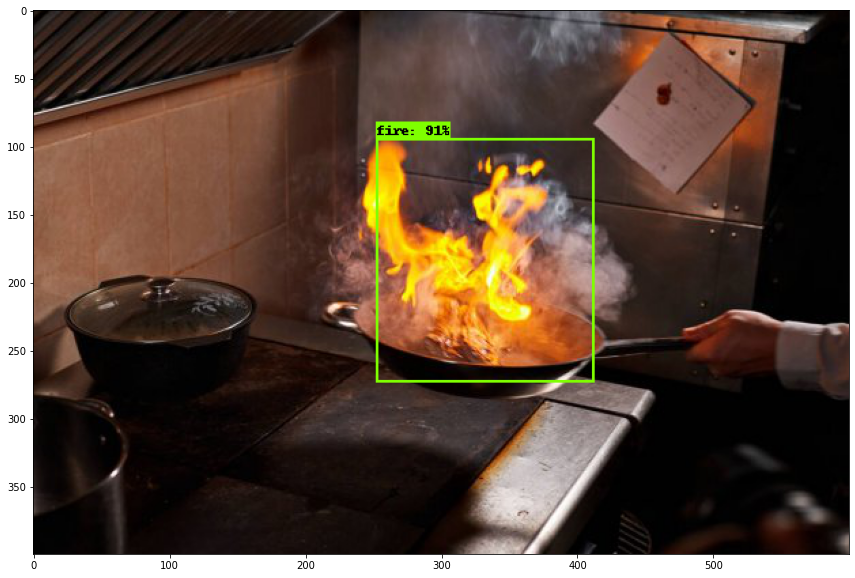

In [33]:
#plot_detection(['C:/Users/Mosa-T/Desktop/content/workspace/data/test.record/image_39.jpg'])
plot_detection(['/content/workspace/data/test.record/image_39.jpg'])
#if it doesn't plot then remove %matlabplot inline, run cell and add it back, run again 

# Upload to train if the results are acceptable

In [ ]:
#from google.colab import drive

#drive.mount('/content/gdrive')

In [ ]:
#!zip -r /content/file.zip /content/workspace

In [ ]:
#cp /content/file.zip /content/gdrive/MyDrive/

# Main event - Run locally - Colab does a terrible job at playing/displaying videos

# Real time detection - Webcam

In [ ]:
#real time detection
cap = cv2.VideoCapture(-1)
cap.read()
#cap = cv2.VideoCapture('C:/Users/Mosa-T/Desktop/content/workspace/data/test.record/video1.mp4')
cap = cv2.VideoCapture(0)

while True:
    _,img = cap.read()
    detections = framePred(img)
    cv2.imshow('object detection',detections)
    key=cv2.waitKey(1)
    if key == ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()

# Fire detection of stored videos can be ran on colab

In [34]:
#downloaded video fire detection
#video = mmcv.VideoReader('C:/Users/Mosa-T/Desktop/content/workspace/data/test.record/output.mp4')
video = mmcv.VideoReader('/content/workspace/data/test.record/output.mp4')
#frames = [Image.fromarray(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)) for frame in video]
frames = [(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)) for frame in video]

frames_tracked = []
for i, frame in enumerate(frames):
    print('\rTracking frames: {}'.format(i + 1), end='')
    frame = framePred(frame)
    frames_tracked.append(frame)
print('\nDone') 
#cv2.destroyAllWindows() 

Tracking frames: 1267
Done


error: ignored

In [39]:
#save detection video
dim = Image.fromarray(frames_tracked[0]).size
fourcc = cv2.VideoWriter_fourcc(*'FMP4')    
video_tracked = cv2.VideoWriter('video_tracked8.mp4', fourcc, 25.0, dim)
for frame in frames_tracked:
    video_tracked.write(cv2.cvtColor(np.array(frame), cv2.COLOR_RGB2BGR))
video_tracked.release()

In [ ]:
#Play saved video
cap = cv2.VideoCapture('C:/Users/Mosa-T/Desktop/content/video_tracked7.mp4')
   
# Check if camera opened successfully
if (cap.isOpened()== False): 
    print("Error opening video  file")

#Read until video is completed
while(cap.isOpened()):
    ret, frame = cap.read()
    if ret == True:
        cv2.imshow('Frame', frame)
    else: 
        break
        
    if cv2.waitKey(30) & 0xFF == ord('q'):
        break
#When everything done, release 
# the video capture object
cap.release()
   
# Closes all the frames
cv2.destroyAllWindows()

# Real-Time detection of stored video with email sending 

In [ ]:
#Downloaded video fire detection - display rather than storing
video = mmcv.VideoReader('C:/Users/Mosa-T/Desktop/content/workspace/data/test.record/video1.mp4')
#video = mmcv.VideoReader(0)

#frames = [Image.fromarray(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)) for frame in video]
frames = [(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)) for frame in video]
frames_tracked = []
mailed_flag = False
for i, frame in enumerate(frames):
    print('\rTracking frames: '.format(i + 1), end='')
    frame_draw,mailed_flag = framePred_email(frame,mailed_flag)
    key=cv2.waitKey(1)
    if key == ord('q'):
        break
    #frames_tracked.append(frame_draw)
    cv2.imshow('detection fire',cv2.cvtColor(np.array(frame_draw), cv2.COLOR_RGB2BGR))
print('\nDone') 
cv2.destroyAllWindows() 

# Attempts at speeding up procceses

# Multithreading

In [ ]:
#trying multithreading for real-time 
class VideoStreamWidget(object):
    def __init__(self, src=0):
        self.capture = cv2.VideoCapture(src)
        # Start the thread to read frames from the video stream
        self.thread = Thread(target=self.update, args=())
        self.thread.daemon = True
        self.thread.start()

    def update(self):
        # Read the next frame from the stream in a different thread
        while True:
            if self.capture.isOpened():
                (self.status, self.frame) = self.capture.read()
            time.sleep(.01)

    def show_frame(self):
        # Display frames in main program
        self.frame=framePred(self.frame)
        cv2.imshow('frame', self.frame)
        key = cv2.waitKey(1)
        if key == ord('q'):
            self.capture.release()
            cv2.destroyAllWindows()
            exit(1)

if __name__ == '__main__':
    video_stream_widget = VideoStreamWidget()
    while True:
        try:
            video_stream_widget.show_frame()
        except AttributeError:
            pass


# Multiprocessing - Sadly windows support for multiprocessing is very messy and buggy so we did not go through with fixing it

In [ ]:
import cv2 as cv
import time
import subprocess as sp
#import multiprocessing as mp
#mp = mp.set_start_method('fork')
import multiprocess as mp
from os import remove

In [ ]:
def get_video_frame_details(file_name):
    cv2video = cv.VideoCapture(file_name)
    height = cv2video.get(cv.CAP_PROP_FRAME_HEIGHT)
    width  = cv2video.get(cv.CAP_PROP_FRAME_WIDTH) 
    framecount = cv2video.get(cv.CAP_PROP_FRAME_COUNT ) 
    return width,height,framecount

In [ ]:
def combine_output_files(num_processes):
    # Create a list of output files and store the file names in a txt file
    list_of_output_files = ["output_{}.mp4".format(i) for i in range(num_processes)]
    with open("list_of_output_files.txt", "w") as f:
        for t in list_of_output_files:
            f.write("file {} \n".format(t))

    # use ffmpeg to combine the video output files
    ffmpeg_cmd = "ffmpeg -y -loglevel error -f concat -safe 0 -i list_of_output_files.txt -vcodec copy " + output_file_name
    sp.Popen(ffmpeg_cmd, shell=True).wait()

    # Remove the temperory output files
    for f in list_of_output_files:
        remove(f)
    remove("list_of_output_files.txt")

# Single process

In [ ]:
def process_video():
    # Read video file
    cap = cv.VideoCapture(file_name)

    # get height, width and frame count of the video
    width, height = (
            int(cap.get(cv.CAP_PROP_FRAME_WIDTH)),
            int(cap.get(cv.CAP_PROP_FRAME_HEIGHT))
        )
    fps = int(cap.get(cv.CAP_PROP_FPS))

    # Define the codec and create VideoWriter object
    fourcc = cv.VideoWriter_fourcc(*'FMP4')
    out = cv.VideoWriter()
    output_file_name = "output_single.mp4"
    out.open(output_file_name, fourcc, fps, (width, height), True)

    try:
        while cap.isOpened():
            ret, frame = cap.read()
            #print(ret)
            if not ret:
                break
            im = frame
            # Perform detection of frame
            im = framePred(im)
            #print(ret)
            # write the frame
            out.write(im)
    except:
        # Release resources
        cap.release()
        out.release()
        

    # Release resources
    cap.release()
    out.release()

In [ ]:
def single_process():
    print("Video processing using single process...")
    start_time = time.time()
    process_video()
    end_time = time.time()
    total_processing_time = end_time - start_time
    print("Time taken: {}".format(total_processing_time))
    print("FPS : {}".format(frame_count/total_processing_time))
    
file_name = "C:/Users/Mosa-T/Desktop/content/input.mp4"
output_file_name = "output_single.mp4"
width, height, frame_count = get_video_frame_details(file_name)
print("Video frame count = {}".format(frame_count))
print("Width = {}, Height = {}".format(width, height))
single_process()

# Multiprocess - waiting on update fix

In [ ]:
def process_video_multiprocessing(group_number):
    # Read video file
    import cv2 as cv
    file_name = "input.mp4"
    output_file_name = "output.mp4"
    width, height, frame_count = get_video_frame_details(file_name)
    print("Video frame count = {}".format(frame_count))
    print("Width = {}, Height = {}".format(width, height))
    num_processes = mp.cpu_count()
    print("Number of CPU: " + str(num_processes))
    frame_jump_unit =  frame_count// num_processes

    
    
    
    
    
    cap = cv.VideoCapture(file_name)
    cap.set(cv.CAP_PROP_POS_FRAMES, frame_jump_unit * group_number)
    # get height, width and frame count of the video
    width, height = (
            int(cap.get(cv.CAP_PROP_FRAME_WIDTH)),
            int(cap.get(cv.CAP_PROP_FRAME_HEIGHT))
        )
    no_of_frames = int(cap.get(cv.CAP_PROP_FRAME_COUNT))
    fps = int(cap.get(cv.CAP_PROP_FPS))
    proc_frames = 0
    # Define the codec and create VideoWriter object
    fourcc = cv.VideoWriter_fourcc(*'FMP4')
    out = cv.VideoWriter()
    output_file_name = "output_multi.mp4"
    out.open("output_{}.mp4".format(group_number), fourcc, fps, (width, height), True)
    try:
        while proc_frames < frame_jump_unit:
            ret, frame = cap.read()
            if not ret:
                break
            im = frame
            # Perform face detection on each frame
            im = framePred(im).copy()
            # Loop through list (if empty this will be skipped) and overlay green bboxes
            # write the frame
            out.write(im)
            proc_frames += 1
    except:
        # Release resources
        cap.release()
        out.release()

    # Release resources
    cap.release()
    out.release()

In [ ]:
def multi_process():
    num_processes = mp.cpu_count()
    print("Video processing using {} processes...".format(num_processes))
    start_time = time.time()
    import cv2 as cv
    file_name = "input.mp4"
    output_file_name = "output.mp4"
    width, height, frame_count = get_video_frame_details(file_name)
    print("Video frame count = {}".format(frame_count))
    print("Width = {}, Height = {}".format(width, height))
    num_processes = mp.cpu_count()
    print("Number of CPU: " + str(num_processes))
    frame_jump_unit =  frame_count// num_processes

    # Paralle the execution of a function across multiple input values
    p = mp.Pool(num_processes)
    print(num_processes)
    p.map(process_video_multiprocessing, range(num_processes))
    print('b')
    combine_output_files(num_processes)
    print('c')
    end_time = time.time()
   
    total_processing_time = end_time - start_time
    print("Time taken: {}".format(total_processing_time))
    print("FPS : {}".format(frame_count/total_processing_time))

#file_name = "input.mp4"
#output_file_name = "output.mp4"
#width, height, frame_count = get_video_frame_details(file_name)
#print("Video frame count = {}".format(frame_count))
#print("Width = {}, Height = {}".format(width, height))
#num_processes = mp.cpu_count()
#print("Number of CPU: " + str(num_processes))
#frame_jump_unit =  frame_count// num_processes
#multi_process()

In [ ]:
if __name__ == '__main__':
    file_name = "input.mp4"
    output_file_name = "output.mp4"
    width, height, frame_count = get_video_frame_details(file_name)
    print("Video frame count = {}".format(frame_count))
    print("Width = {}, Height = {}".format(width, height))
    num_processes = mp.cpu_count()
    print("Number of CPU: " + str(num_processes))
    frame_jump_unit =  frame_count// num_processes
    # Paralle the execution of a function across multiple input values
    p = mp.Pool(num_processes)
    print(num_processes)
    p.map(process_video_multiprocessing, range(num_processes))
    print('b')
    combine_output_files(num_processes)
    print('c')
    end_time = time.time()
   
    total_processing_time = end_time - start_time
    print("Time taken: {}".format(total_processing_time))
    print("FPS : {}".format(frame_count/total_processing_time))

# Helpful code - recording, playbacks and delay videos

In [ ]:
#record and playback for webcam.
import numpy as np
import cv2

def rec():
    # record a video
    cap = cv2.VideoCapture(0)
    # Define the codec and create VideoWriter object
    fourcc = cv2.VideoWriter_fourcc(*'FMP4')
    out = cv2.VideoWriter('output.mp4',fourcc, 30.0, (640,480))

    while(cap.isOpened()):
        ret, frame = cap.read()
        if ret==True:
            out.write(frame)
            cv2.imshow('frame',frame)
            if cv2.waitKey(1) & 0xFF == ord('q'):
                break
        else:
            break

    # Release everything if job is finished
    cap.release()
    out.release()

def playback():
    # play a video
    cap = cv2.VideoCapture('output.mp4')

    while(cap.isOpened()):
        ret, frame = cap.read()
        if ret:
            cv2.imshow('frame',frame)
        else:
            break
        if cv2.waitKey(30) & 0xFF == ord('q'):
            break

    cap.release()

# create empty window to process input

cv2.namedWindow('frame')
# main loop
while True:
    key = cv2.waitKey(10) 
    if key == ord('r'):
        rec()
    elif key == ord('p'):
        playback()
    elif key == ord('x'):
        # end main loop
        cv2.destroyAllWindows()

In [ ]:
#webcam with delay
import cv2
import time

cap = cv2.VideoCapture(0)
print(cap.get(3))
print(cap.get(4))

start_time = time.time()

DELAY_SECONDS = 5
frames = []

DELAY_SECONDS = 5

while True:

    ret, frame = cap.read()
    frame = framePred(frame)
    frames.append(frame)
    if time.time() - start_time > DELAY_SECONDS:
        cv2.imshow("frame", frames.pop(0))

    key = cv2.waitKey(60)
    if key == ord('q'):
        break

cv2.destroyAllWindows() 
